In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rome
import transformers

DEVICE = 'cuda:0'

tokenizer = transformers.GPT2Tokenizer.from_pretrained("gpt2", 
        padding_side="left")
model = transformers.AutoModelForCausalLM.from_pretrained("gpt2", use_cache=False)
model.to(DEVICE)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )


In [3]:
model.transformer.h[0].mlp

GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [4]:
import rome
old_fact = rome.Fact(subject="Shaquille O'Neal", predicate="plays the sport of", object="basketball")
new_fact = rome.Fact(subject="Shaquille O'Neal", predicate="plays the sport of", object="soccer")
inputs = rome.inputs(tokenizer, old_fact)

probs = rome.find_most_activated_layer(tokenizer, model, model.transformer.h, inputs, old_fact)

<|endoftext|><|endoftext|><|endoftext|>Michael Jordan plays the sport of


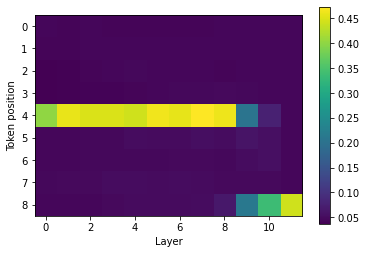

In [5]:
import matplotlib.pyplot as plt
plt.ylabel('Token position')
plt.xlabel('Layer')
plt.imshow(probs.cpu().T)
plt.colorbar()
plt.show()


In [6]:
layer_idx, token_idx = rome.find_region_of_max_causal_effect(probs)
layer_idx, token_idx

(7, 4)

In [7]:
probs[:, token_idx]

tensor([0.4019, 0.4586, 0.4498, 0.4491, 0.4413, 0.4648, 0.4568, 0.4737, 0.4620,
        0.2049, 0.0762, 0.0432], device='cuda:0')

In [7]:

activations = rome.maximize_activations_at_layer(tokenizer, model, model.transformer.h, layer_idx, token_idx, inputs, new_fact)

 baseball
tensor(3.0320, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9964, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9646, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9353, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8788, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8528, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8286, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7788, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7553, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7323, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6821, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6565, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6298, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6021, device='cuda:0'

In [ ]:
import rome
hidden_state = rome.find_layer_hidden_state(model, layer_idx, token_idx, inputs)

In [23]:
C = rome.find_average_inputs_to_layer(tokenizer, model, layer_idx)

Reusing dataset wikitext (/home/ubuntu/.cache/huggingface/datasets/wikitext/wikitext-103-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126)


  0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
new_weights = rome.new_weights_from_activation(tokenizer, model, layer_idx, hidden_state, activations, C)

In [12]:
((hidden_state.to(model.device) @ new_weights) - activations)

tensor([[-1.9133e-05, -3.7163e-04, -5.4342e-04, -6.3351e-04, -1.5408e-04,
         -2.2328e-04,  2.0391e-04, -6.1610e-04, -2.0167e-04,  1.4609e-04,
          4.0948e-05,  1.0759e-04,  1.2392e-04, -1.0401e-05,  1.8304e-04,
          2.9325e-05, -8.7334e-04, -5.3811e-04, -5.2154e-05,  2.2895e-04,
          9.6929e-04, -1.7375e-04,  1.6937e-04,  5.5075e-05, -6.8116e-04,
         -2.6381e-04,  7.3703e-04, -2.9364e-04, -7.6413e-05, -1.7136e-04,
          2.3013e-04,  1.4299e-04,  8.0019e-05, -7.5048e-04, -8.6766e-04,
          8.0168e-05, -1.4287e-04,  5.4926e-04,  7.3075e-05, -2.6959e-04,
         -1.3745e-04,  5.4169e-04,  5.8359e-04, -2.6321e-04,  8.1635e-04,
         -3.6341e-04, -3.1289e-04,  2.3772e-04,  2.0021e-04,  5.5349e-04,
          4.0233e-05,  4.8006e-04, -3.7557e-04,  4.5234e-04,  6.2212e-06,
         -2.3264e-04,  7.0342e-04,  2.1487e-04,  3.0367e-04,  3.0831e-05,
         -1.4434e-04, -1.4013e-04, -6.3300e-05, -2.4813e-04,  1.0058e-06,
          2.0230e-04, -8.1551e-04, -1.

In [32]:
save_weights = model.transformer.h[layer_idx].mlp.c_proj.weight.data.clone()
model.transformer.h[layer_idx].mlp.c_proj.weight.data[:] = new_weights


In [33]:

print(model.transformer.h[layer_idx].mlp.c_proj.weight - new_weights)
print(new_fact)
logits = rome.test_on_fact(model, tokenizer, new_fact)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<SubBackward0>)
Fact(subject='Michael Jordan', predicate='plays the sport of', object='baseball')


In [37]:
import torch as t
# model.transformer.h[11].mlp.c_proj.weight.data[:] = save_weights
indices = t.softmax(logits[0, -1], dim=0).topk(10).indices
indices

tensor([ 9669,  4346, 13126, 22948,  9283,  5701, 21576, 12217, 11783, 20790],
       device='cuda:0')

In [38]:
tokenizer.decode(indices)

' basketball football golf rugby baseball sports boxing hockey soccer tennis'

In [36]:
model.transformer.h[layer_idx].mlp.c_proj.weight.data[:] = save_weights


In [ ]:
(hidden_state.to(model.device) @ save_weights), activations

(tensor([ 0.1554,  0.1213, -0.1999,  ...,  0.6630,  0.6062, -0.3827],
        device='cuda:0'),
 tensor([[0.2602, 0.5054, 0.2548,  ..., 0.6162, 0.2572, 0.5559]],
        device='cuda:0', requires_grad=True))

In [18]:
new_hidden_state, output = rome.find_layer_hidden_state(tokenizer, model, layer_idx, new_fact)

TypeError: 'Fact' object is not subscriptable

In [ ]:
output.shape

torch.Size([6, 1600])

In [ ]:
hidden_state

tensor([-0.0664, -0.0006, -0.1025,  ..., -0.1526, -0.0198, -0.0087])

In [ ]:
save_weights.shape

torch.Size([6400, 1600])